Daniel Arthur Notebook

Introduciton: The model used by Zillow is more prone to error in Washington compared to the set as a whole. We create a model that less prone to error in Washington, which Zillow could use to improve their buisness. We are looking at a data set of housing information in the relavent area. 

Import relevant libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import numpy as np
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
%matplotlib inline

Download dataset. This dataset provides us with information about the price and several relavent correlate for housing in Seatle. This is useful, because we are helping out client make decisions in the Seatle housing market.

Describe the data sources and explain why the data are suitable for the project
Present the size of the dataset and descriptive statistics for all features used in the analysis
Justify the inclusion of features based on their properties and relevance for the project
Identify any limitations of the data that have implications for the project


In [2]:
df= pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Select relevant colums, based on suggestions of people familiar with the data.
The colomns selected should be useful correlates of our target, which is the price. 
    There are many other influences on housing that are not caputured by the data. Macro forces may dominate the causal chain of qualities we are interested in. 

In [4]:
relevant_columns =['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'yr_built']
#relevant_columns_water = ['id', 'grade', 'price', 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront','yr_built']
df = df[relevant_columns]
#df = df[relevant_columns_water]
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,1987


#remove grade strings, leaving number
df['grade'] = df['grade'].str.replace(r'\D', '').astype(int)
#convert grade to int from object but first have to convert to string first
df['grade'].astype(str).astype(int)
#turn boolian into int
df.replace(to_replace= 'NO', value= 0, inplace=True)
df.replace(to_replace= 'YES', value= 1, inplace=True)
df.replace(to_replace= 'NaN', value= 0, inplace=True)

In [5]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'yr_built'],
      dtype='object')

Get a basic understanding of the data and find useful trends

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1970.999676
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,29.375234
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1900.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1951.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1975.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,1997.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,2015.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   yr_built     21597 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 1.3 MB


In [8]:
df.shape

(21597, 8)

In [9]:
#sklearn.dummy.DummyRegressor(df, strategy='mean', constant=None, quantile=None)

In [10]:
dfcorr= df.corr()
dfcorr

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,0.021617
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.053953
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.155670
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.507173
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.318152
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.052946
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.489193
yr_built,0.021617,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,1.000000


<AxesSubplot:>

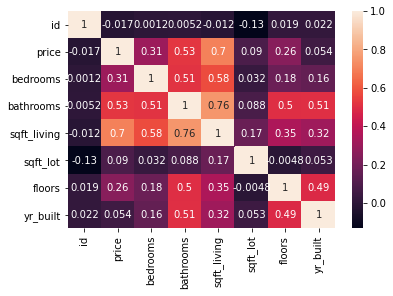

In [11]:
sns.heatmap(dfcorr, xticklabels=dfcorr.columns, yticklabels=dfcorr.columns, annot=True)

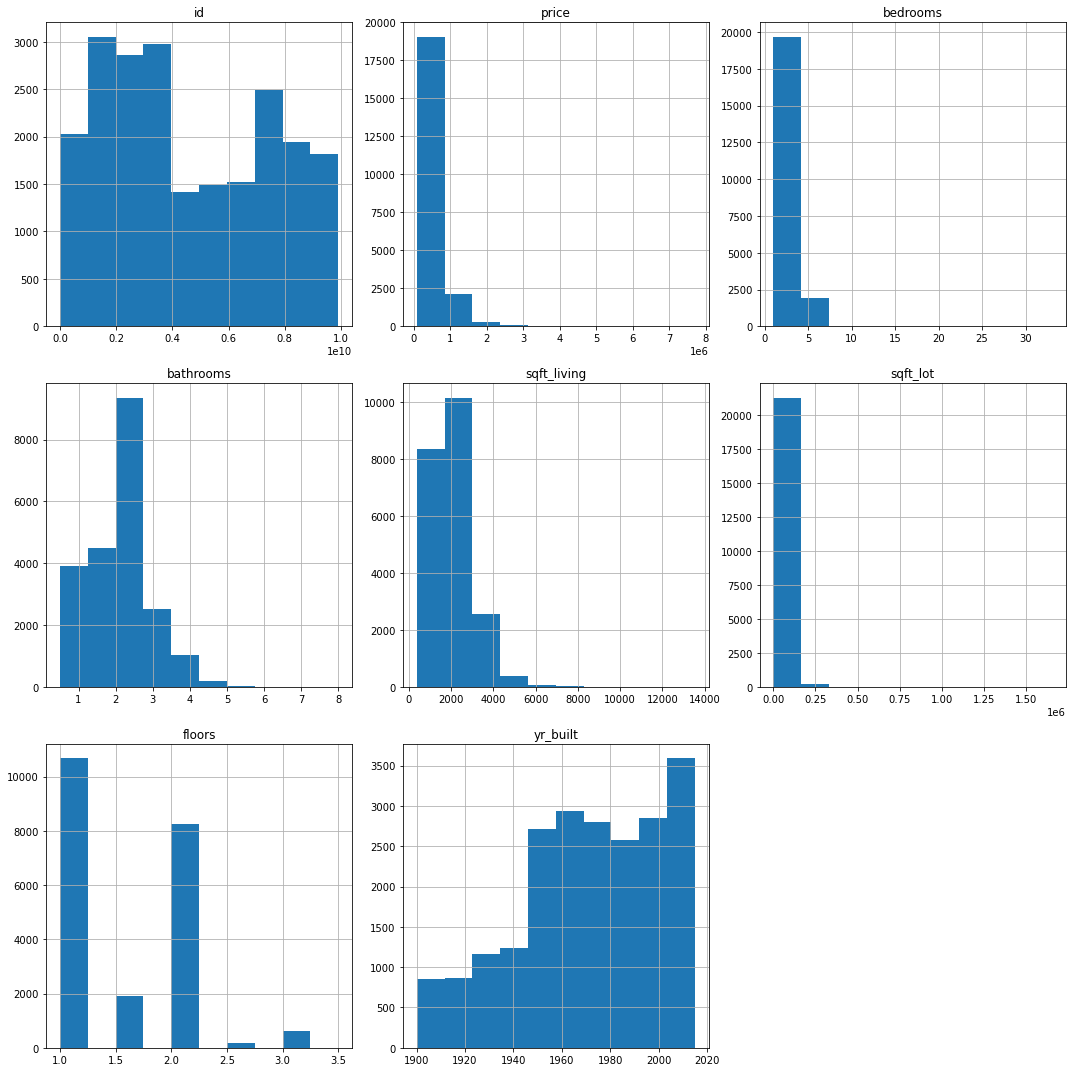

In [12]:
# Histogram for continuous variables 
cols = []
for x in df.columns: 
    if df[x].dtype != 'object': 
        cols.append(x)

df[cols].hist(figsize=(15,15))
plt.tight_layout()

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

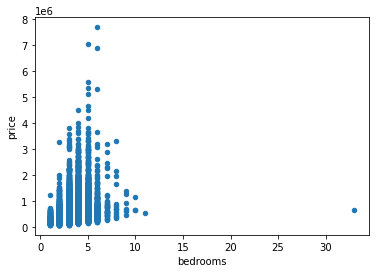

In [13]:
df.plot.scatter(y='price', x='bedrooms')

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

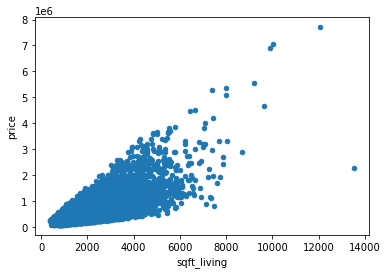

In [14]:
df.plot.scatter(y='price', x='sqft_living')

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

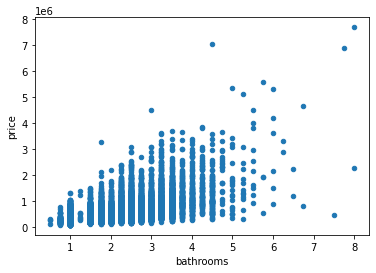

In [15]:
df.plot.scatter(y='price', x='bathrooms')

The prediction target for this analysis is the sale price of the home, so we separate the data into X and y accordingly:

In [16]:
y = df["price"]
X = df.drop("price", axis=1)

Next, we separate the data into a train set and a test set prior to performing any preprocessing steps:

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Print Results

In [18]:
print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

X_train is a DataFrame with 16197 rows and 7 columns
y_train is a Series with 16197 values


Create a baseline model

In [19]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_test, y_test)

DummyRegressor()

In [20]:
dummy_regr.predict(X_test)

array([537333.45814815, 537333.45814815, 537333.45814815, ...,
       537333.45814815, 537333.45814815, 537333.45814815])

In [21]:
dummy_regr.score(X_test, y_test)

0.0

Attempt a better model and get its score  X_test, y_test

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.5583339111861738

In [23]:
model.predict(X_test)

array([ 158639.85952882,  403581.21786724,  343008.89453452, ...,
       1122042.14288106, 1783428.76541734,  153917.89568166])

Runs and interprets a simple, baseline model for comparison
Introduces new models that improve on prior models and interprets their results
Explicitly justifies model changes based on the results of prior models and the problem context
This model predicts more of the target variable. It is not overfitted or under fitted, the score of the train and test samples are within one percent. I included the variable most correlated with the target variable.


Linear Regression

Explicitly identify the features and interpret their coefficients in plain language
Explain the implications of results for the real-world problem the project aims to address
Identify specific actions that stakeholders should take to leverage these results


In [24]:
nf= pd.read_csv('data/kc_house_data.csv')

In [25]:
relevant_columns_water = ['id', 'grade', 'price', 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront','yr_built']
dg = nf[relevant_columns_water]
dg.head()

,id,grade,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built
0,7129300520,7 Average,221900.0,3,1.00,1180,5650,1.0,NaN,1955
1,6414100192,7 Average,538000.0,3,2.25,2570,7242,2.0,NO,1951
2,5631500400,6 Low Average,180000.0,2,1.00,770,10000,1.0,NO,1933
3,2487200875,7 Average,604000.0,4,3.00,1960,5000,1.0,NO,1965
4,1954400510,8 Good,510000.0,3,2.00,1680,8080,1.0,NO,1987


In [26]:
# Create a formula which incorporates sqft_living, bedrooms, and bathrooms.
#formula = 'price ~ bedrooms'
formula= 'price ~ sqft_living+ C(waterfront)'

In [27]:
# feed the formula and dataframe into an instance of the ols class
# chain the fit method off the end to train the model|
model = ols(formula=formula, data=dg).fit()

In [28]:
# run the summary method off the end of the fit model 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                 1.112e+04
Date:                Tue, 16 Nov 2021   Prob (F-statistic):               0.00
Time:                        13:02:29   Log-Likelihood:            -2.6644e+05
No. Observations:               19221   AIC:                         5.329e+05
Df Residuals:                   19218   BIC:                         5.329e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -3.838e+04   4523.199     -8.484      0.000   -4.72e+04   -2.95e+04
C(waterfront)[T.YES]   8.62e+05   2.12e+04     40.691      0.000    8.21e+05    9.04e+05
sqft_living            275.3850      1.994    138.120      0.000     271.477     279.293
==============================================================================
Omnibus:                    12096.613   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           415252.652
Skew:                           2.497   Prob(JB):                         0.00
Kurtosis:                      25.216   Cond. No.                     2.64e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
np.random.seed(42)

In [30]:
my_sample = df.sample(1)
my_sample_price = my_sample.iloc[0, 0]
my_sample_pt = my_sample.drop('price', axis=1)

# Show my random sample off
print(f'Price of sample: ${my_sample_price}')
my_sample_pt

Price of sample: $6303401050


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built
3686,6303401050,3,0.75,850,8573,1.0,1945


In [31]:
def train_lr_randomly(data, sample_pt=None, ntimes=100):
    '''
    Takes in features & targets from `data` to train a linear regression with a
    random sample `ntimes`. It then returns a list of R2 scores, RMSEs, and the 
    predictions from a provided data point of features `sample_pt`.
    '''
    # To save all of our predictions
    r2 = []
    rmse = []
    # Only return predictions if there is something to predict (sample_pt given)
    point_preds = [] if (sample_pt is not None) else None

    # We'll repeat this little experiment to see how the model does
    for i in range(ntimes):
        # Creating a random sample of data to train on
        df_sample = data.sample(5000, replace=True)
        y = df_sample.price
        X = df_sample.drop('price', axis=1)

        # Our linear regression model about to be trained
        lr = LinearRegression()
        lr.fit(X, y)

        # Making predictions & evaluating on the data we used to train the model
        y_hat = lr.predict(X)
        rmse.append(np.sqrt(mean_squared_error(y, y_hat)))
        r2.append(lr.score(X, y))

        # Making a prediction on the one point the model definitely never saw
        if sample_pt is not None:
            y_hat_pt = lr.predict(sample_pt)
            # Getting just the single point to add into list
            point_preds.append(y_hat_pt[0])
    
    return r2, rmse, point_preds

In [32]:
# Run 100 linear regression trainings on some random data from df and compare
# it with the random sample point
r2_simple, rmse_simple, pt_preds_simple = train_lr_randomly(data=df, sample_pt=my_sample_pt, ntimes=100)    

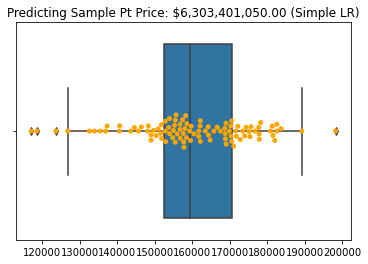

In [33]:
ax = sns.boxplot(x=pt_preds_simple);
ax = sns.swarmplot(x=pt_preds_simple, color='orange', ax=ax)
ax.set_title(f'Predicting Sample Pt Price: ${my_sample_price:,.2f} (Simple LR)');

Now let's see how we do with a more complex model (using polynomial features)

Now let's see how we do with a more complex model (using polynomial features)

In [34]:
pf = PolynomialFeatures(2)

df_poly = pd.DataFrame(pf.fit_transform(df.drop('price', axis=1)))
df_poly.index = df.index
df_poly['price'] = df['price']

cols = list(df_poly)

# move the column to head of list using index, pop and insert
cols.insert(0, cols.pop(cols.index('price')))

df_poly = df_poly.loc[:, cols]

df_poly.head(10)

,price,0,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,32,33,34,35
0,221900.0,1.0,7.129301e+09,3.0,1.00,1180.0,5650.0,1.0,1955.0,5.082693e+19,...,1392400.0,6667000.0,1180.0,2306900.0,3.192250e+07,5650.0,11045750.0,1.0,1955.0,3822025.0
1,538000.0,1.0,6.414100e+09,3.0,2.25,2570.0,7242.0,2.0,1951.0,4.114068e+19,...,6604900.0,18611940.0,5140.0,5014070.0,5.244656e+07,14484.0,14129142.0,4.0,3902.0,3806401.0
2,180000.0,1.0,5.631500e+09,2.0,1.00,770.0,10000.0,1.0,1933.0,3.171380e+19,...,592900.0,7700000.0,770.0,1488410.0,1.000000e+08,10000.0,19330000.0,1.0,1933.0,3736489.0
3,604000.0,1.0,2.487201e+09,4.0,3.00,1960.0,5000.0,1.0,1965.0,6.186168e+18,...,3841600.0,9800000.0,1960.0,3851400.0,2.500000e+07,5000.0,9825000.0,1.0,1965.0,3861225.0
4,510000.0,1.0,1.954401e+09,3.0,2.00,1680.0,8080.0,1.0,1987.0,3.819681e+18,...,2822400.0,13574400.0,1680.0,3338160.0,6.528640e+07,8080.0,16054960.0,1.0,1987.0,3948169.0
5,1230000.0,1.0,7.237550e+09,4.0,4.50,5420.0,101930.0,1.0,2001.0,5.238213e+19,...,29376400.0,552460600.0,5420.0,10845420.0,1.038972e+10,101930.0,203961930.0,1.0,2001.0,4004001.0
6,257500.0,1.0,1.321400e+09,3.0,2.25,1715.0,6819.0,2.0,1995.0,1.746098e+18,...,2941225.0,11694585.0,3430.0,3421425.0,4.649876e+07,13638.0,13603905.0,4.0,3990.0,3980025.0
7,291850.0,1.0,2.008000e+09,3.0,1.50,1060.0,9711.0,1.0,1963.0,4.032065e+18,...,1123600.0,10293660.0,1060.0,2080780.0,9.430352e+07,9711.0,19062693.0,1.0,1963.0,3853369.0
8,229500.0,1.0,2.414600e+09,3.0,1.00,1780.0,7470.0,1.0,1960.0,5.830294e+18,...,3168400.0,13296600.0,1780.0,3488800.0,5.580090e+07,7470.0,14641200.0,1.0,1960.0,3841600.0
9,323000.0,1.0,3.793500e+09,3.0,2.50,1890.0,6560.0,2.0,2003.0,1.439064e+19,...,3572100.0,12398400.0,3780.0,3785670.0,4.303360e+07,13120.0,13139680.0,4.0,4006.0,4012009.0


In [35]:
# Let's make sure we have another sample point to test our models
my_sample_pt_poly = pf.transform(my_sample_pt)

# Show my random sample off
print(f'Price of sample: ${my_sample_price}')
my_sample_pt_poly.shape

Price of sample: $6303401050


(1, 36)

In [36]:
# Run 100 linear regression trainings on some random polynomial features data
# from df_poly and compare it with the random sample point
r2_poly, rmse_poly, pt_preds_poly = train_lr_randomly(
                                                data=df_poly, 
                                                sample_pt=my_sample_pt_poly,
                                                ntimes=100                            
)

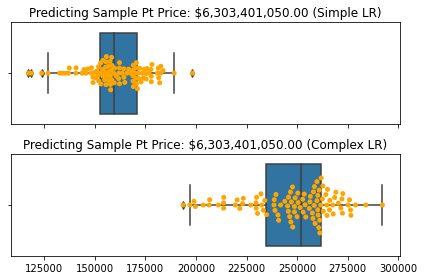

In [37]:
f, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(6,4));

# Simple model
ax = sns.boxplot(x=pt_preds_simple, ax=ax1);
ax = sns.swarmplot(x=pt_preds_simple, color='orange', ax=ax)
ax.set_title(f'Predicting Sample Pt Price: ${my_sample_price:,.2f} (Simple LR)');

# Complex model
ax = sns.boxplot(x=pt_preds_poly, ax=ax2);
ax = sns.swarmplot(x=pt_preds_poly, color='orange', ax=ax)
ax.set_title(f'Predicting Sample Pt Price: ${my_sample_price:,.2f} (Complex LR)');

# Makes spacing work better
f.tight_layout()

In [38]:
print('How it did on its own training data:')
print(f'\t- simple mean {np.mean(rmse_simple)}')
print(f'\t- complex mean {np.mean(rmse_poly)}')
print('\n')

print('How it did on data it never saw:')
print(f'\t- simple variance {np.std(pt_preds_simple)}')
print(f'\t- complex variance {np.std(pt_preds_poly)}')

How it did on its own training data:
	- simple mean 244691.417429705
	- complex mean 233463.90691777534


How it did on data it never saw:
	- simple variance 15039.664919549894
	- complex variance 21096.940486912074


Conclusion summarizes implications of the project for the real-world problem and stakeholders